In [42]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.datasets import load_boston

# boston 데이셋 로드 
boston = load_boston()

print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [43]:
# boston DataFrame으로 변환
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)  # feasture_names이 있는 Data 불러오기
print(bostonDF.info())
print(bostonDF.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB
None
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222

In [44]:
# boston 데이터셋의 target 열(컬럼)은 주택 가격
# boston.target 을 price 컬럼으로 추가함. 
bostonDF['price'] = boston.target
print(bostonDF.head())
print(bostonDF.shape)

# 컬럼추가해서 파일로 내보내기
bostonDF.to_csv('boston.csv', encoding='utf-8')

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  
(506, 14)


In [45]:
# 다음의 각 컬럼 RM, ZN, INDUS, NOX, AGE, PTRATIO, LSTAT, RAD 의 총 8개의 컬럼에
# 대해서 값이 증가핛수록 PRICE에 어떤 영향을 미치는지 분석하고 시각화를 해보자

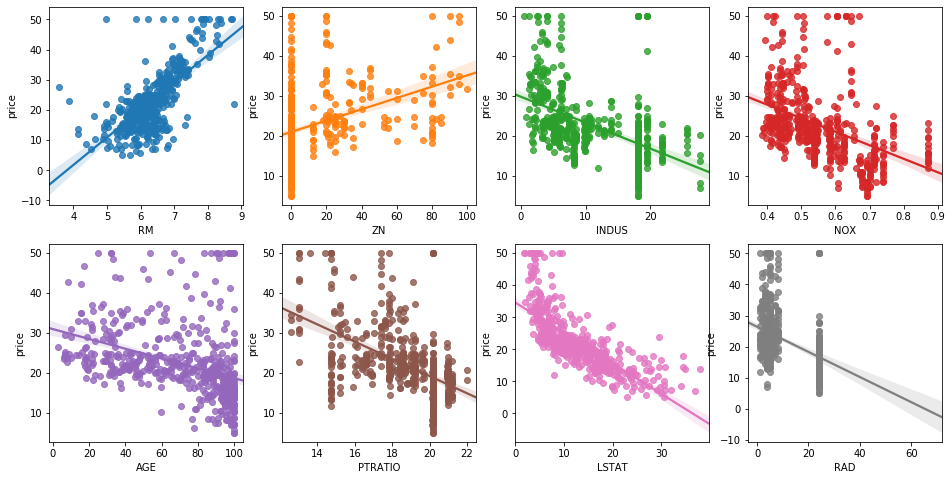

In [46]:
# 2행 4열 그래프 생성
fig, axs = plt.subplots(figsize=(16,8), nrows=2, ncols=4)
im_features =  ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']

for i, feature in enumerate(im_features) : 
    row = int(i / 4)
    col = i % 4 
    sns.regplot(x=feature, y='price', 
                data=bostonDF, 
                ax=axs[row][col])   # 그래프 위치 

plt.show()
# RM(방개수)와 LSTAT(하위 계층의 비율)이 PRICE에 영향도가 가장 두드러지게 나타남.

# 1. RM(방개수)은 양 방향의 선형성(Positive Linearity)이 가장 크다.
# 방의 개수가 많을수록 가격이 증가하는 모습을 확연히 보여준다.

# 2. LSTAT(하위 계층의 비율)는 음 방향의 선형성(Negative Linearity)이 가장 크다.
# 하위 계층의 비율이 낮을수록 PRICE 가 증가하는 모습을 확연히 보여준다.

In [47]:
# train_test_split()을 이용해 학습과 테스트 데이터셋을 분리해서 학습과 예측을 수행한다.
# LinearRegression 클래스를 이용해서 보스턴 주택 가격의 회귀 모델을 만들어 보자

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 모델평가 - r2_score 함수로 회귀계수를 구할수 있음.
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
# train data와 test data를 분리하기 위해서 y 축을 분리 시킴 
y_target = bostonDF['price']

# 'price' 컬럼을 삭제 하고 받아온 데이터를 리턴함.
x_target = bostonDF.drop(['price'], axis=1, inplace=False)

print(y_target.head())
print(x_target.head())

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [49]:
# 7:3 비율로 분리 
# 교차 검증을 하기위해서 train data와 test data로 분할 해서 7:3 비율로 검증 진행
# overfitting 을 줄이기 위한 작업 

x_train, x_test, y_train, y_test = train_test_split(x_target,               # 13개의 컬럼 데이터 
                                                    y_target,               # price 컬럼 데이터
                                                    test_size=0.3,          # 테스트 데이터의 비율 설정 0.3
                                                    random_state=156)       # 난수의 시드를 임의 값으로 고정

# 분리된 데이터 확인
print(x_train)
print(y_train)

CRIM    ZN  INDUS  CHAS     NOX     RM    AGE     DIS   RAD    TAX  \
49    0.21977   0.0   6.91   0.0  0.4480  5.602   62.0  6.0877   3.0  233.0   
19    0.72580   0.0   8.14   0.0  0.5380  5.727   69.5  3.7965   4.0  307.0   
261   0.53412  20.0   3.97   0.0  0.6470  7.520   89.4  2.1398   5.0  264.0   
503   0.06076   0.0  11.93   0.0  0.5730  6.976   91.0  2.1675   1.0  273.0   
72    0.09164   0.0  10.81   0.0  0.4130  6.065    7.8  5.2873   4.0  305.0   
..        ...   ...    ...   ...     ...    ...    ...     ...   ...    ...   
63    0.12650  25.0   5.13   0.0  0.4530  6.762   43.4  7.9809   8.0  284.0   
485   3.67367   0.0  18.10   0.0  0.5830  6.312   51.9  3.9917  24.0  666.0   
418  73.53410   0.0  18.10   0.0  0.6790  5.957  100.0  1.8026  24.0  666.0   
204   0.02009  95.0   2.68   0.0  0.4161  8.034   31.9  5.1180   4.0  224.0   
44    0.12269   0.0   6.91   0.0  0.4480  6.069   40.0  5.7209   3.0  233.0   

     PTRATIO       B  LSTAT  
49      17.9  396.90  16.20  


In [50]:
# 선형 회귀 수행 
# 모델 생성
model = LinearRegression()

# 모델 학습
model.fit(x_train, y_train)

# 실제값은 y_test 임.
# 모델 예측 값 - 30% 비율이 데이터로 예측 결과
y_predict = model.predict(x_test)
print(y_predict)

[23.15424087 19.65590246 36.42005168 19.96705124 32.40150641 17.66341192
 30.32844101 17.8513932  10.86187069 12.83177966 21.18350434 16.41212257
 28.66817527 37.01110952 23.42172197 24.56906089 14.55434775 11.51023436
 30.27784089 23.48027467 22.86210577 17.61623753 21.2528808  17.29802868
 34.06118291  7.19879841 13.39928425 19.4234468  13.2423286   8.3336837
 29.34933073 11.83768837 19.84125562 23.97623235 16.34351261 13.20973749
 14.3352014  17.26323753 17.37091562 23.84644351 32.8390912   9.3866759
 19.06694335 -3.98840206 19.87721947 21.26003361 24.17775745 35.35923599
 20.32415303 28.23212889 32.67560962 40.83910565 41.19126206 19.78588457
 25.0134137  24.13111046 19.62715719 33.49344219 23.61402811 15.31513017
 22.70657074 25.78436589 23.99723589  8.78013424 21.81929237 39.68193998
 32.8907251  30.20417723 14.35610647 23.56129992 13.6987184  32.17099211
 36.43647957 27.41243794 21.43887413 29.94548936 20.80737308 26.76489459
 23.19924205 18.7295963  30.4434358  17.92366103 19.9

In [51]:
# 모델 평가 - r2_scroe(실제데이터, 예측데이터)
print('결정계수:', r2_score(y_test, y_predict))

# 결정계수 0.75 정도면 성능이 높기는 하지만.. 애매하다 
# 각 알고리즘 별로 학습능력 및 예측 능력이 달라진다. 

결정계수: 0.7572263323138942


In [54]:
# LinearRegression 으로 생성한 주택가격 모델의 회귀계수(coefficients)와 절편(intercept)을 구해보자
# 회귀계수는 LinearRegression 객체의 coef_ 속성으로 구할 수 있고,
# 절편은 LinearRegression 객체의 intercept_ 속성으로 구할 수 있다.

print('회귀계수값:', np.round(model.coef_, 1 )) # 소수 첫째자리
print('절편값:', model.intercept_)

# 회귀계수를 큰 값 순으로 정렬하기 위해서 Series로 생성함.
coff = pd.Series(data=np.round(model.coef_, 1), index=x_target.columns)
print(coff.sort_values(ascending=False))

회귀계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]
절편값: 40.995595172164755
RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64


* RM(방개수)와 LSTAT(하위 계층의 비율)이 PRICE에 영향도가 가장 두드러지게 나타남.

* RM(방개수)은 양 방향의 선형성(Positive Linearity)이 가장 크다.
  * 방의 개수가 많을수록 가격이 증가하는 모습을 확연히 보여준다.

* LSTAT(하위 계층의 비율)는 음 방향의 선형성(Negative Linearity)이 가장 크다.
  * 하위 계층의 비율이 낮을수록 PRICE 가 증가하는 모습을 확연히 보여준다